# Telecom churn Task

# Предсказание оттока телеком компании

#### Что такое "скорость оттока"?

Коэффициент оттока - это процент подписчиков на услугу, которые прекращают свою подписку на услугу в течение заданного периода времени. Для того чтобы компания могла расширить свою клиентуру, ее темпы роста, измеряемые числом новых клиентов, должны превышать темпы оттока. Этот показатель обычно выражается в процентах.

#### Почему отток так важен?

Отток клиентов - это термин, используемый в компаниях с подписочной моделью ведения бизнеса для описания потери клиентов. Например, если 10 из 100 подписчиков интернет-провайдера (ISP) отменили свои подписки, скорость оттока для этого провайдера составит 10%.

Отток важен, потому что он напрямую влияет на прибыльность вашего сервиса. Принято считать, что прибыльность услуги напрямую связана с ростом ее клиентской базы. Это может привести владельцев бизнеса к выводу, что для того, чтобы увеличить свою клиентскую базу, скорость приобретения новых клиентов должна превышать скорость оттока.

#### Что из себя представляет датасет?

Датасет представляет из себя 3333 записи из истории компании о клиентах с 21 колонкой. Каждая колонка описывает клиента - его штат проживания, время использования услуги, номер, перечень подписок, время разговора, прочее.

#### Ниже будет представлен процесс (pipeline) обработки датасета с комментариями.

------

## Загрузка данных

Загрузка данных может зависить от среды, где вы работаете. 

Если это гугл колаб - вам необходимо выполнить следующие комманды:

В первой вам необходимо перейти по ссылке, авторизироваться со своим аккаунтом, скопировать код из окна и вставить в поле выполнения ячейки.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


Клонируем файлы с гита

In [2]:
!git clone https://github.com/tixonsit/Sberbank_materials.git

Cloning into 'Sberbank_materials'...
remote: Enumerating objects: 45, done.
remote: Total 45 (delta 0), reused 0 (delta 0), pack-reused 45
Unpacking objects: 100% (45/45), done.
Checking out files: 100% (20/20), done.


Загружаем все необходимые библиотеки

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

[Открываем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) склонированную папку

In [0]:
df = pd.read_csv('/content/Sberbank_materials/telecom_churn.csv')

[Отображаем](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) данные

In [5]:
df.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


В случае, если вы работаете из среды анаконда - вам необходимо положить файл рядом с ноутбуком и выполнить:

```
df = pd.read_csv('./telecom_churn.csv')
```

 

## Работа с признаками

#### Визуальный анализ

Изучим наши данные, какие признаки исходного датасета никак не повлияют на результат прогноза? Выбросим такие столбцы и отобразим результат.

In [6]:
del df['phone number']
# del df['state'] 
# del df['international plan'] 
# del df['voice mail plan'] 
#df['total_call_time'] = df['total day minutes'] + df['total eve minutes'] +  df['total night minutes'] + df['total intl minutes']
df

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,no,yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,no,no,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,no,no,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,yes,no,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False


Посмотрим на описательную статистику, которая суммирует центральную тенденцию, дисперсию и форму распределения набора данных. Корректно ли все заполнено?

In [7]:
df.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,101.064806,437.182418,8.099010,179.775098,100.435644,30.562307,200.980348,100.114311,17.083540,200.872037,100.107711,9.039325,10.237294,4.479448,2.764581,1.562856
std,39.822106,42.371290,13.688365,54.467389,20.069084,9.259435,50.713844,19.922625,4.310668,50.573847,19.568609,2.275873,2.791840,2.461214,0.753773,1.315491
min,1.000000,408.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,23.200000,33.000000,1.040000,0.000000,0.000000,0.000000,0.000000
25%,74.000000,408.000000,0.000000,143.700000,87.000000,24.430000,166.600000,87.000000,14.160000,167.000000,87.000000,7.520000,8.500000,3.000000,2.300000,1.000000
50%,101.000000,415.000000,0.000000,179.400000,101.000000,30.500000,201.400000,100.000000,17.120000,201.200000,100.000000,9.050000,10.300000,4.000000,2.780000,1.000000
75%,127.000000,510.000000,20.000000,216.400000,114.000000,36.790000,235.300000,114.000000,20.000000,235.300000,113.000000,10.590000,12.100000,6.000000,3.270000,2.000000
max,243.000000,510.000000,51.000000,350.800000,165.000000,59.640000,363.700000,170.000000,30.910000,395.000000,175.000000,17.770000,20.000000,20.000000,5.400000,9.000000


Посмотрим на типы данных наших столбцов:

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64


Посмотрим как сбалансированны наши классы, можно распечатать или отобразить на грфике. Если не помните почему надо балансировать классы - [тык](https://www.coursera.org/lecture/supervised-learning/niesbalansirovannyie-dannyie-M97UX)

Можно увидеть, что данные несбалансированны.


False    2850
True      483
Name: churn, dtype: int64


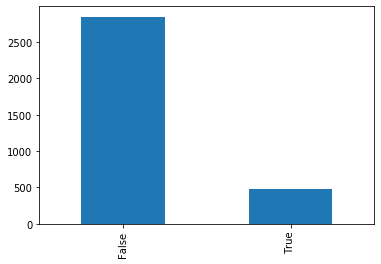

In [9]:
print(df['churn'].value_counts())
df['churn'].value_counts().plot(kind='bar')

#### Работа с категориальными признаками

In [10]:
df_onehot = pd.get_dummies(df, columns=['international plan',  'voice mail plan']) 
df_onehot

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,KS,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0,0,1
1,OH,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,0,0,1
2,NJ,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1,0,1,0
3,OH,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,1,1,0
4,OK,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,AZ,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,1,0,0,1
3329,WV,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,1,0,1,0
3330,RI,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,1,0,1,0
3331,CT,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0,1,1,0


In [11]:
# Подключаем класс для предобработки данных
from sklearn import preprocessing

# Напишем функцию, которая принимает на вход DataFrame, кодирует числовыми значениями категориальные признаки
# и возвращает обновленный DataFrame и сами кодировщики.
def number_encode_features(init_df):
    result = init_df.copy() # копируем нашу исходную таблицу
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object: # np.object -- строковый тип / если тип столбца - строка, то нужно его закодировать
            encoders[column] = preprocessing.LabelEncoder() # для колонки column создаем кодировщик
            result[column] = encoders[column].fit_transform(result[column]) # применяем кодировщик к столбцу и перезаписываем столбец
    return result, encoders

encoded_data, encoders = number_encode_features(df) # Теперь encoded data содержит закодированные кат. признаки 
encoded_data.head() 

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


Отобразим сами энкодеры

In [12]:
encoders

{'international plan': LabelEncoder(),
 'state': LabelEncoder(),
 'voice mail plan': LabelEncoder()}

In [13]:
encoded_data_onehot, encoders_onehot = number_encode_features(df_onehot)
encoded_data_onehot

,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False,1,0,0,1
1,35,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False,1,0,0,1
2,31,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False,1,0,1,0
3,35,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False,0,1,1,0
4,36,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,3,192,415,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False,1,0,0,1
3329,49,68,415,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False,1,0,1,0
3330,39,28,510,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False,1,0,1,0
3331,6,184,510,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False,0,1,1,0


Выделим целевую переменную в бинарный формат и выкенем ее из обучающей выборки.

In [14]:
y = encoded_data['churn'].map({True: 1, False: 0}).values
encoded_data.drop(['churn'], axis=1, inplace = True)

print(y)
encoded_data.head()

[0 0 0 ... 0 0 0]


,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
0,16,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1
1,35,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1
2,31,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0
3,35,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2
4,36,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3


In [15]:
y_onehot = encoded_data_onehot['churn'].map({True: 1, False: 0}).values
encoded_data_onehot.drop(['churn'], axis=1, inplace = True)

print(y_onehot)
encoded_data_onehot.head()

[0 0 0 ... 0 0 0]


,state,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,1,0,0,1
1,35,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,1,0,0,1
2,31,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,1,0,1,0
3,35,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0,1,1,0
4,36,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0,1,1,0


Посмотрим на распределение велечин по признакам в наших данных


 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe9169e4eb8>


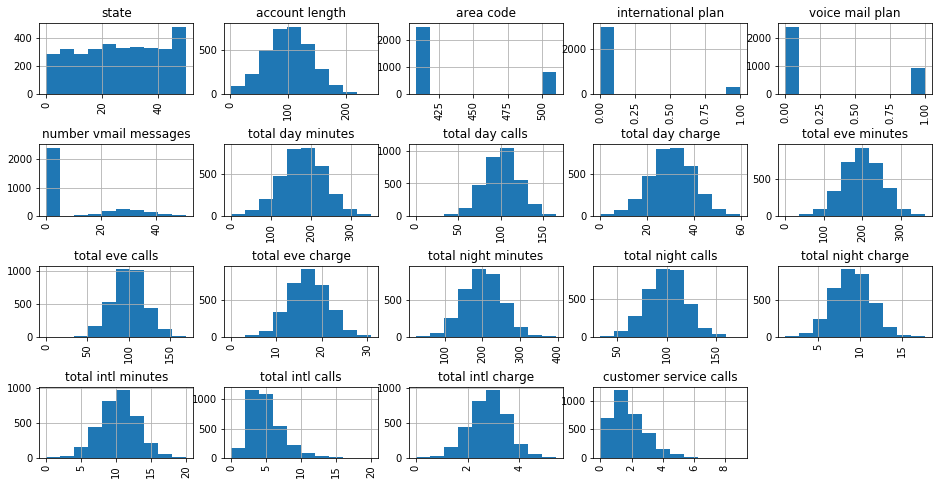

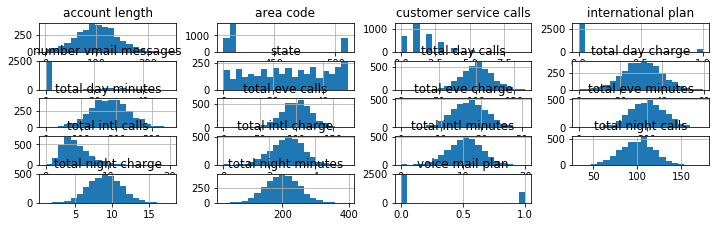

In [16]:
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_data.shape[1]) / cols)
for i, column in enumerate(encoded_data.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

print('\n', encoded_data.hist(figsize=(12,4), layout=(6,4), bins=20 ))


 [[<matplotlib.axes._subplots.AxesSubplot object at 0x7fe916fea6d8>


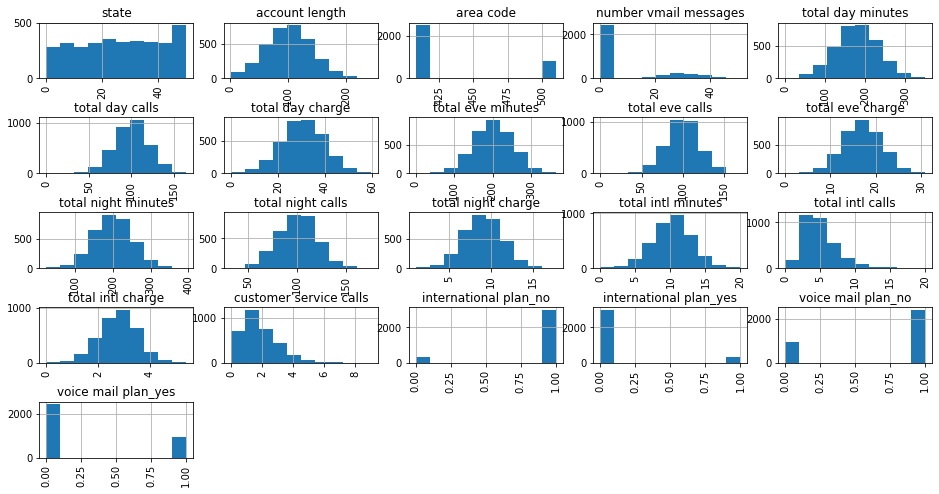

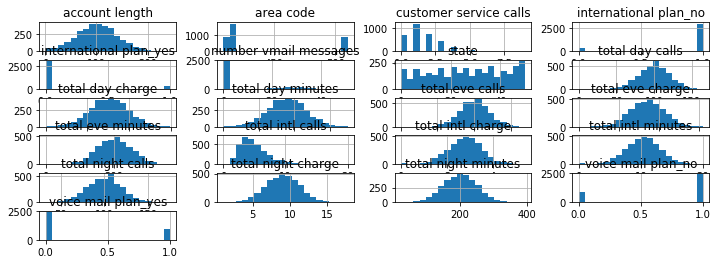

In [17]:
fig = plt.figure(figsize=(16,8))
cols = 5

rows = np.ceil(float(encoded_data_onehot.shape[1]) / cols)
for i, column in enumerate(encoded_data_onehot.columns):
    ax = fig.add_subplot(rows, cols, i + 1)
    ax.set_title(column)
    encoded_data_onehot[column].hist(axes=ax)
    plt.xticks(rotation="vertical")
plt.subplots_adjust(hspace=0.7, wspace=0.2)

print('\n', encoded_data_onehot.hist(figsize=(12,4), layout=(6,4), bins=20 ))

Посмтроим матрицу корреляций, выбросим данные с единичной линейной зависимостью - они (шум) просто повысят вычислительную сложность.

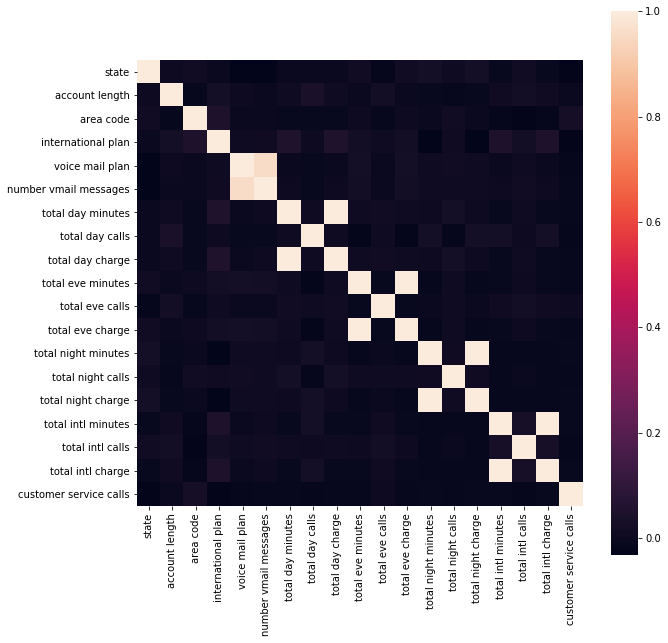

In [18]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data.corr(), square=True)
plt.show()

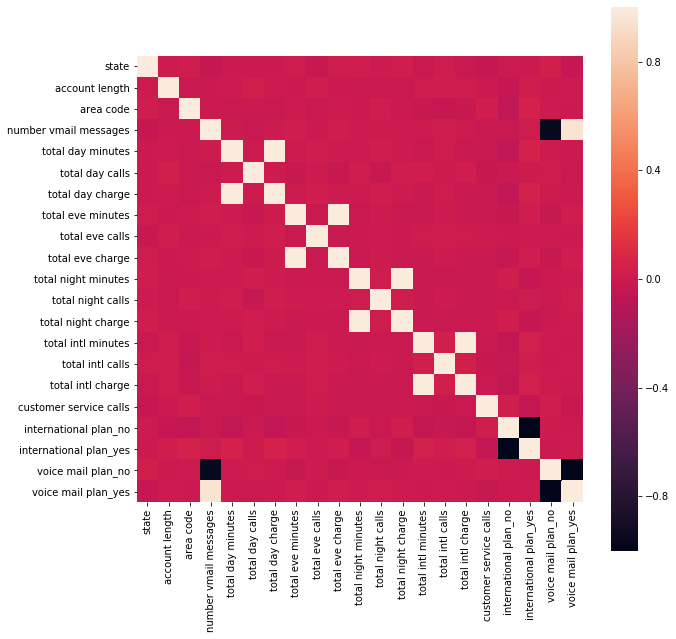

In [19]:
plt.subplots(figsize=(10,10))
sns.heatmap(encoded_data_onehot.corr(), square=True)
plt.show()

In [20]:
# encoded_data.dropna()
encoded_data.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)
encoded_data.head()

,state,account length,area code,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls
0,16,128,415,0,1,25,265.1,110,197.4,99,244.7,91,10.0,3,1
1,35,107,415,0,1,26,161.6,123,195.5,103,254.4,103,13.7,3,1
2,31,137,415,0,0,0,243.4,114,121.2,110,162.6,104,12.2,5,0
3,35,84,408,1,0,0,299.4,71,61.9,88,196.9,89,6.6,7,2
4,36,75,415,1,0,0,166.7,113,148.3,122,186.9,121,10.1,3,3


In [21]:
encoded_data_onehot.drop(columns=['total day charge', 'total eve charge', 'total night charge', 'total intl charge'], axis=1, inplace=True)
encoded_data_onehot.head()

,state,account length,area code,number vmail messages,total day minutes,total day calls,total eve minutes,total eve calls,total night minutes,total night calls,total intl minutes,total intl calls,customer service calls,international plan_no,international plan_yes,voice mail plan_no,voice mail plan_yes
0,16,128,415,25,265.1,110,197.4,99,244.7,91,10.0,3,1,1,0,0,1
1,35,107,415,26,161.6,123,195.5,103,254.4,103,13.7,3,1,1,0,0,1
2,31,137,415,0,243.4,114,121.2,110,162.6,104,12.2,5,0,1,0,1,0
3,35,84,408,0,299.4,71,61.9,88,196.9,89,6.6,7,2,0,1,1,0
4,36,75,415,0,166.7,113,148.3,122,186.9,121,10.1,3,3,0,1,1,0


## Работа с данными

Создадим обучающую выборку Х, перевдем получанные цифровые данные в np.array

In [22]:
X = encoded_data.values.astype(np.float)
X

array([[ 16. , 128. , 415. , ...,  10. ,   3. ,   1. ],
       [ 35. , 107. , 415. , ...,  13.7,   3. ,   1. ],
       [ 31. , 137. , 415. , ...,  12.2,   5. ,   0. ],
       ...,
       [ 39. ,  28. , 510. , ...,  14.1,   6. ,   2. ],
       [  6. , 184. , 510. , ...,   5. ,  10. ,   2. ],
       [ 42. ,  74. , 415. , ...,  13.7,   4. ,   0. ]])

Нормализуем наши данные. Если не помните зачем это делать? [тык](https://www.coursera.org/lecture/supervised-learning/masshtabirovaniie-priznakov-ozNT3)

In [23]:
sc = sklearn.preprocessing.StandardScaler()
X = sc.fit_transform(X)
X

array([[-0.6786493 ,  0.67648946, -0.52360328, ..., -0.08500823,
        -0.60119509, -0.42793202],
       [ 0.6031696 ,  0.14906505, -0.52360328, ...,  1.24048169,
        -0.60119509, -0.42793202],
       [ 0.33331299,  0.9025285 , -0.52360328, ...,  0.70312091,
         0.21153386, -1.1882185 ],
       ...,
       [ 0.87302621, -1.83505538,  1.71881732, ...,  1.3837779 ,
         0.61789834,  0.33235445],
       [-1.35329082,  2.08295458,  1.71881732, ..., -1.87621082,
         2.24335625,  0.33235445],
       [ 1.07541867, -0.67974475, -0.52360328, ...,  1.24048169,
        -0.19483061, -1.1882185 ]])

Надо помнить, что наша выборка несбралансирована, так что надо будет провести ее балансировку, в ходе занятия было показано, что будет (у precision 0.18), если ее не проводить:

Найдем по y индексы клиентов, которые относятся к классу "не ушили"
и, перемешав выборку, обрежем ее до размеров "ушедших". Т.к. это на занятии не разбиралось - код прилагается.

In [24]:
# np.argwhere вернет индексы тех элементов массив y, где значение 0
not_churn_ids = np.argwhere(y == 0).flatten()
print('Всего не ушедших', len(not_churn_ids))
not_churn_ids

Всего не ушедших 2850


array([   0,    1,    2, ..., 3330, 3331, 3332])

Перемешаем массив с выбранным random state (чтоб в дальнейшем у нас совпадали выборки) выберем в нем "лишние" id тех, кто остались (кто портит нам прогноз алгоритма). Кол-во "лишних" = кол-во оставшихся - кол-во ушедшых.

In [25]:
from sklearn.utils import shuffle

not_churn_ids = shuffle(not_churn_ids, random_state = 42)
# найдем "лишних", для этого обрежем найденные id на кол-во ушедших (внутри len)
not_churn_ids = not_churn_ids[len(np.argwhere(y == 1).flatten()):]
print(len(not_churn_ids))
# отображаем кол-во и сами id, которые мы должны выкинуть
not_churn_ids

2367


array([ 877, 3298,  614, ..., 1291, 1482,  989])

Проверим, сбалансированны ли классы

по идее (оставшиеся) - ("лишние") = (ушедшие)

In [26]:
len(np.argwhere(y == 0).flatten()) - len(not_churn_ids) == len(np.argwhere(y == 1).flatten())

True

Теперь можно выкинуть "лишние" id из X и y

In [0]:
# np.delete принимает массив, индексы, которые выбросить и по какой оси выкидывать
X = np.delete(X, not_churn_ids, 0)
y = np.delete(y, not_churn_ids, 0)

In [28]:
# отобразим итоговый размер признаков датасета
X.shape, y.shape

((966, 15), (966,))

In [29]:
pd.Series(y).value_counts()

1    483
0    483
dtype: int64

In [30]:
X_onehot = encoded_data_onehot.values.astype(np.float)
print(X_onehot)

X_onehot = sc.fit_transform(X_onehot)
print(X_onehot)

not_churn_ids_onehot = np.argwhere(y == 0).flatten()
print('Всего не ушедших', len(not_churn_ids_onehot))
print(not_churn_ids_onehot)

not_churn_ids_onehot = shuffle(not_churn_ids_onehot, random_state = 42)
not_churn_ids_onehot = not_churn_ids_onehot[len(np.argwhere(y == 1).flatten()):]
print(len(not_churn_ids_onehot))
print(not_churn_ids_onehot)

print(len(np.argwhere(y == 0).flatten()) - len(not_churn_ids_onehot) == len(np.argwhere(y == 1).flatten()))

X_onehot = np.delete(X_onehot, not_churn_ids_onehot, 0)
y_onehot = np.delete(y_onehot, not_churn_ids_onehot, 0)

print(X.shape, y.shape)
print(pd.Series(y).value_counts())

[[ 16. 128. 415. ...   0.   0.   1.]
 [ 35. 107. 415. ...   0.   0.   1.]
 [ 31. 137. 415. ...   0.   1.   0.]
 ...
 [ 39.  28. 510. ...   0.   1.   0.]
 [  6. 184. 510. ...   1.   1.   0.]
 [ 42.  74. 415. ...   0.   0.   1.]]
[[-0.6786493   0.67648946 -0.52360328 ... -0.32758048 -1.6170861
   1.6170861 ]
 [ 0.6031696   0.14906505 -0.52360328 ... -0.32758048 -1.6170861
   1.6170861 ]
 [ 0.33331299  0.9025285  -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 ...
 [ 0.87302621 -1.83505538  1.71881732 ... -0.32758048  0.61839626
  -0.61839626]
 [-1.35329082  2.08295458  1.71881732 ...  3.05268496  0.61839626
  -0.61839626]
 [ 1.07541867 -0.67974475 -0.52360328 ... -0.32758048 -1.6170861
   1.6170861 ]]
Всего не ушедших 483
[  3   5   6   9  10  11  14  15  17  20  21  23  27  30  31  32  35  36
  39  40  42  44  45  46  47  48  50  51  54  55  56  58  60  61  62  65
  67  68  71  73  74  75  76  78  79  81  83  89  90  92  95  96  98  99
 102 104 105 107 108 110 111 113 114 119 12

## Создание алгоритмов

Посмотрим на 2 типа алгоритмов - KNN и линейную модель. В случае KNN будем решать задачу классификации. В случае линейного классификатора, для демонстрации всей обработки, будем использовать регрессию.

Разделим нашу выборку на test train в соотношении 85 на 15 %

In [31]:
from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(df.drop('churn', axis=1), df.churn, test_size=0.33, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train)
print(X_test)
print(y_train)
print(y_test)

[[-0.20640023 -1.10670738 -0.52360328 ...  0.09411203 -0.60119509
   0.33235445]
 [-0.88104175  0.67648946 -0.68883427 ...  3.10333239 -1.00755957
  -1.1882185 ]
 [ 1.54766774  0.0234878  -0.68883427 ... -0.08500823 -1.41392404
   1.8529274 ]
 ...
 [ 0.73809791 -0.05185854 -0.68883427 ... -0.83731332 -1.41392404
   1.09264093]
 [-1.48821913  0.04860325 -0.52360328 ...  0.45235255  1.02426282
  -1.1882185 ]
 [ 0.40077714  0.52579677 -0.68883427 ... -0.62236901 -1.00755957
   0.33235445]]
[[ 1.61513189  0.0737187  -0.68883427 ...  0.88224117 -1.00755957
  -0.42793202]
 [ 1.07541867 -0.05185854 -0.68883427 ... -0.98060953 -0.60119509
  -0.42793202]
 [-0.54372099  0.55091222  1.71881732 ... -1.30302599 -1.00755957
   1.09264093]
 ...
 [-0.6786493  -1.38297731  1.71881732 ...  1.09718548 -1.00755957
   0.33235445]
 [ 0.33331299  0.82718216  1.71881732 ... -1.48214625  0.21153386
   0.33235445]
 [-0.47625684 -0.52905206 -0.68883427 ... -0.08500823 -1.00755957
   0.33235445]]
[1 0 0 0 0 0 1 0

In [32]:
# Для другой кодировки
X_train_onehot, X_test_onehot, y_train_onehot, y_test_onehot = train_test_split(X_onehot, y_onehot, test_size=0.33, random_state=42)

print(X_train_onehot)
print(X_test_onehot)
print(y_train_onehot)
print(y_test_onehot)

[[-0.74611345 -0.83043744 -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 [-0.00400777  0.75183581 -0.52360328 ... -0.32758048 -1.6170861
   1.6170861 ]
 [ 0.4682413  -0.35324392  1.71881732 ... -0.32758048 -1.6170861
   1.6170861 ]
 ...
 [ 0.73809791 -0.88066834 -0.68883427 ... -0.32758048  0.61839626
  -0.61839626]
 [-1.01597006  1.70622285 -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 [ 0.94049036 -1.63413179 -0.68883427 ... -0.32758048 -1.6170861
   1.6170861 ]]
[[ 1.61513189  0.29975774  1.71881732 ... -0.32758048  0.61839626
  -0.61839626]
 [-0.8135776  -0.85555289 -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 [ 1.00795452 -0.07697399 -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 ...
 [-0.07147192 -0.57928296 -0.52360328 ... -0.32758048  0.61839626
  -0.61839626]
 [ 0.4682413  -0.93089924 -0.68883427 ... -0.32758048  0.61839626
  -0.61839626]
 [-1.69061159  1.00299029 -0.68883427 ... -0.32758048  0.61839626
  -0.61839626]]
[0 0 0 ... 0 0 0]
[

#### KNN

Построим сетку для перебора гиперпараметра для нахождения лучшего гиперпараметра KNN, пройдем 100 значений (от 1 до 100)

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn_grid = {'n_neighbors': np.array(np.linspace(1, 100), dtype='int')} 

gs = GridSearchCV(knn, knn_grid, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97, 100])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [42]:
gs_onehot = GridSearchCV(knn, knn_grid, cv=5)
gs_onehot.fit(X_onehot, y_onehot)

GridSearchCV(cv=5, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': array([  1,   3,   5,   7,   9,  11,  13,  15,  17,  19,  21,  23,  25,
        27,  29,  31,  33,  35,  37,  39,  41,  43,  45,  47,  49,  51,
        53,  55,  57,  59,  61,  63,  65,  67,  69,  71,  73,  75,  77,
        79,  81,  83,  85,  87,  89,  91,  93,  95,  97, 100])},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
# Функция отрисовки графиков

def grid_plot(x, y, x_label, title, y_label='roc_auc'):
    plt.figure(figsize=(12, 6))
    plt.grid(True)
    plt.plot(x, y, 'go-')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)

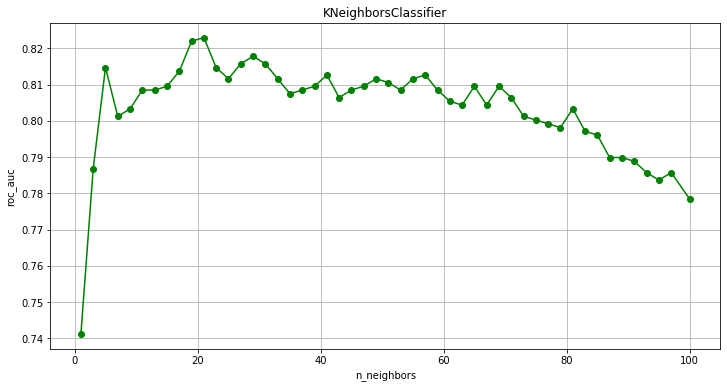

In [39]:
grid_plot(knn_grid['n_neighbors'], gs.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

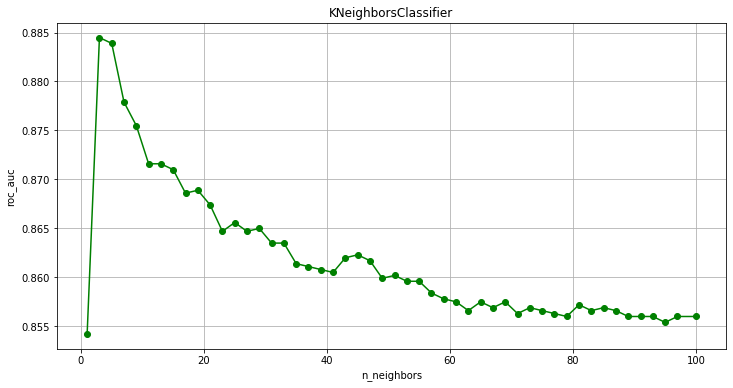

In [43]:
# One-hot

grid_plot(knn_grid['n_neighbors'], gs_onehot.cv_results_['mean_test_score'], 'n_neighbors', 'KNeighborsClassifier')

Отобразим лучший параметр

In [45]:
print(gs.best_params_, gs.best_score_)
print(gs_onehot.best_params_, gs_onehot.best_score_)

{'n_neighbors': 21} 0.8229528337161476
{'n_neighbors': 3} 0.8844883864374118


Инициализируем отдельный классификатор с лучшим значением, найденным на предыдущего перебора

In [0]:
knn = KNeighborsClassifier(n_neighbors=21) #gs.best_model
clf_knn = knn.fit(X_train, y_train)

#onehot
knn_onehot = KNeighborsClassifier(n_neighbors=3) #gs.best_model
clf_knn_onehot = knn_onehot.fit(X_train_onehot, y_train_onehot)

Получим предсказания от классификатора

In [48]:
y_knn = clf_knn.predict(X_test)
print(y_knn)

y_knn_onehot = clf_knn_onehot.predict(X_test_onehot)
print(y_knn_onehot)

[0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 1
 1 0 1 1 0 0 1 1 0 1 1 0 0 0 1 1 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 1 0 1 0 0 0
 0 1 1 1 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 1 0 1 1 1 0 1 0 0 1 0 1 1 0 1 0 0
 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 0 1 1 0 0 0 1 0 1 0 0 0 1 0 0 1 0 0 1
 1 1 0 0 0 1 0 0 1 0 1 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0 1 1 0 1 0
 0 1 0 1 0 1 1 1 0 0 0 0 1 0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0
 0 1 0 0 1 1 1 0 0 0 0 1 1 1 0 0 0 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 1
 0 0 0 0 0 1 0 1 1 1 1 1 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 1 0 1 1
 1 0 0 0 0 0 1 0 0 0 0 1 0 1 1 1 1 0 0 0 1 0 0]
[0 0 0 ... 0 1 0]


Посмотрим на метрики качества через classification report

In [49]:
from sklearn import metrics

print ('knn =', metrics.accuracy_score(y_test, y_knn), '\n')
print(metrics.classification_report(y_test, y_knn))
print('macro = ', metrics.f1_score(y_test, y_knn, average='macro'), ', micro = ', metrics.f1_score(y_test, y_knn, average='micro'))

knn = 0.7931034482758621 

              precision    recall  f1-score   support

           0       0.74      0.90      0.81       157
           1       0.88      0.69      0.77       162

    accuracy                           0.79       319
   macro avg       0.81      0.79      0.79       319
weighted avg       0.81      0.79      0.79       319

macro =  0.7911309523809524 , micro =  0.7931034482758621


In [50]:
# onehot метрики

print ('knn_onehot =', metrics.accuracy_score(y_test_onehot, y_knn_onehot), '\n')
print(metrics.classification_report(y_test_onehot, y_knn_onehot))
print('macro_onehot = ', metrics.f1_score(y_test_onehot, y_knn_onehot, average='macro'), ', micro_onehot = ', metrics.f1_score(y_test_onehot, y_knn_onehot, average='micro'))

knn_onehot = 0.87 

              precision    recall  f1-score   support

           0       0.89      0.96      0.93       940
           1       0.60      0.31      0.41       160

    accuracy                           0.87      1100
   macro avg       0.75      0.64      0.67      1100
weighted avg       0.85      0.87      0.85      1100

macro_onehot =  0.6692258033312937 , micro_onehot =  0.87


Заметно, что при onehot кодировании выросла точность на неплохой процент

#### Линейный классификатор

Построим линейную регрессию

In [53]:
from sklearn import linear_model

regres = linear_model.LinearRegression()
regres.fit(X_train, y_train)

# onehot
regres_onehot = linear_model.LinearRegression()
regres_onehot.fit(X_train_onehot, y_train_onehot)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

Получим результаты

In [55]:
predictions = regres.predict(X_test)
print(predictions)

predictions_onehot = regres_onehot.predict(X_test_onehot)
print(predictions_onehot)

[ 3.48527293e-01 -7.18372695e-03  4.74541054e-01  4.30961122e-01
  2.42978408e-01  1.27822642e-03  4.52241876e-01  7.00529669e-01
  6.31618916e-01  3.24962388e-01  6.57986708e-01  4.93393716e-01
  6.65749347e-01  6.09134354e-01  9.64261570e-01  1.82091279e-01
  3.54313349e-01  5.54694557e-01  5.30119506e-01 -2.13295709e-01
 -4.32335327e-02  3.87126497e-01  2.86699515e-01  6.01623072e-01
  3.21879890e-01  1.08956596e-01  3.60603753e-01  4.49233086e-01
  5.76907429e-01  3.91611700e-01  5.47211212e-01  7.47538506e-01
  4.68893707e-01  1.23309219e-01  8.36863268e-01  2.97656243e-01
  1.01777643e+00  2.94162140e-01  2.08377174e-01  4.90483520e-01
  6.35709628e-01  1.51032805e-01  4.80874018e-01  7.77674139e-01
  8.79875027e-01  3.01882118e-01  9.82534244e-01  1.08730553e+00
  2.25640589e-01  1.44491848e-01  3.39095797e-01  8.64239051e-01
  5.58954042e-01  6.81153464e-01  3.59371099e-01  6.56387135e-01
  7.14906412e-01  1.18178210e-01  2.20025375e-01  9.95435049e-01
  5.41557118e-01  3.09996

Построим график того, как истинные ответы отличаются от предсказанных

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.08782506, 0.17565012, 0.08782506, 0.17565012, 0.43912529,
        0.17565012, 0.08782506, 0.52695035, 0.52695035, 0.35130024,
        0.61477541, 0.61477541, 0.52695035, 0.35130024, 1.14172577,
        0.79042553, 1.31737588, 0.87825059, 1.493026  , 0.70260047,
        0.70260047, 0.61477541, 0.35130024, 0.17565012, 0.08782506,
        0.35130024, 0.70260047, 0.87825059, 0.35130024, 0.35130024,
        0.52695035, 0.87825059, 0.35130024, 0.61477541, 0.96607565,
        0.96607565, 1.14172577, 1.05390071, 0.61477541, 1.05390071,
        0.79042553, 0.35130024, 0.61477541, 0.52695035, 0.70260047,
        0.52695035, 0.08782506, 0.17565012, 0.17565012, 0.26347518]),
 array([-0.97010427, -0.93441063, -0.89871698, -0.86302334, -0.8273297 ,
        -0.79163606, -0.75594241, -0.72024877, -0.68455513, -0.64886149,
        -0.61316785, -0.5774742 , -0.54178056, -0.50608692, -0.47039328,
        -0.43469963, -0.39900599, -0.36331235, -0.32761871, -0.29192507,
        -0.25623142, -0.22

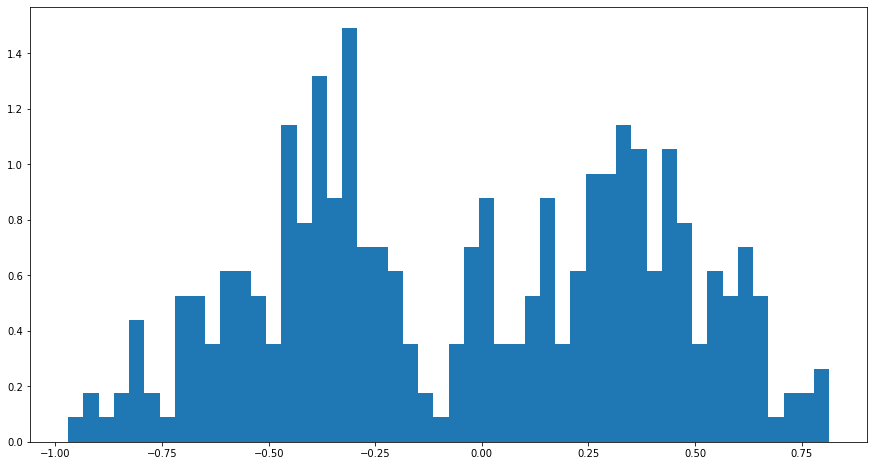

In [56]:
rem = predictions - y_test
plt.figure(figsize=(15, 8))
plt.hist(rem, bins=50, normed=True)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  This is separate from the ipykernel package so we can avoid doing imports until


(array([0.05213326, 0.05213326, 0.02606663, 0.07819989, 0.05213326,
        0.18246641, 0.28673293, 0.33886619, 0.49526597, 0.8601988 ,
        0.18246641, 0.20853304, 0.2606663 , 0.23459967, 0.02606663,
        0.23459967, 0.15639978, 0.10426652, 0.18246641, 0.02606663,
        0.05213326, 0.05213326, 0.        , 0.02606663, 0.07819989,
        0.07819989, 0.13033315, 0.46919934, 0.88626543, 1.30333151,
        1.95499726, 2.60666302, 2.84126269, 3.12799562, 2.58059639,
        2.37206335, 1.43366466, 1.27726488, 1.14693173, 0.5213326 ,
        0.20853304, 0.36493282, 0.36493282, 0.10426652, 0.2606663 ,
        0.10426652, 0.07819989, 0.10426652, 0.05213326, 0.05213326]),
 array([-1.06956787, -1.03469221, -0.99981655, -0.96494089, -0.93006523,
        -0.89518957, -0.86031391, -0.82543825, -0.79056259, -0.75568693,
        -0.72081128, -0.68593562, -0.65105996, -0.6161843 , -0.58130864,
        -0.54643298, -0.51155732, -0.47668166, -0.441806  , -0.40693034,
        -0.37205468, -0.33

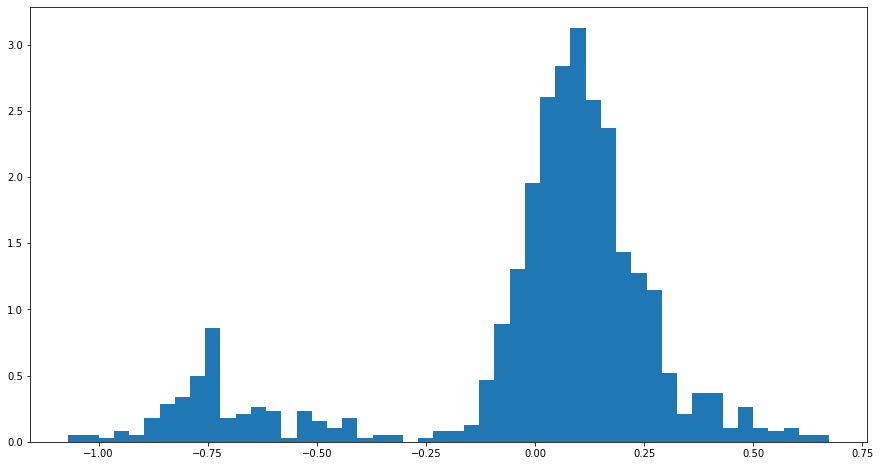

In [57]:
#one hot 
rem_onehot = predictions_onehot - y_test_onehot
plt.figure(figsize=(15, 8))
plt.hist(rem_onehot, bins=50, normed=True)

Разброс при onehot уменьшился.

Получим результат по $R^2$

In [58]:
from sklearn import metrics

r2 = metrics.r2_score(y_test, predictions)
r2

0.22526351568895198

Получим результат по MAE

In [59]:
mae = metrics.mean_absolute_error(y_test, predictions)
mae

0.38718156545541854

In [60]:
# onehot
r2_onehot = metrics.r2_score(y_test_onehot, predictions_onehot)
print(r2_onehot)

mae_onehot = metrics.mean_absolute_error(y_test_onehot, predictions_onehot)
mae_onehot

0.17513450398703168


0.2189257258642742

mae и r2 при onehot уменьшились

            r2 and mae score
r2                  0.225264
r2_onehot           0.175135
mae                 0.387182
mae_onehot          0.218926


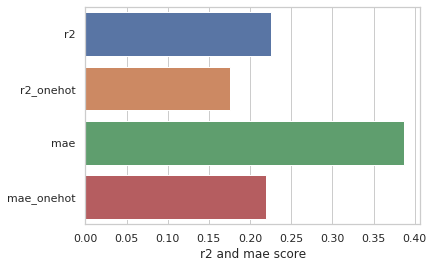

In [88]:
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")

data = pd.DataFrame([r2, r2_onehot, mae, mae_onehot], columns=['r2 and mae score'], index=['r2', 'r2_onehot', 'mae', 'mae_onehot'])
print(data)
ax = sns.barplot(x="r2 and mae score", y=data.index, data=data)

Мы построили 2 алгоритма, классификации через KNN - получили достаточно высокий f1 (~82%), без заметных проседаний в метриках Precision и Recall (благодаря балансировке классов) и линейный классификатор, который показал себя хуже, что видно по метрикам $R^2$ и Mean absolute error

# Добавим другие алгоритмы

Решающее дерево

In [138]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# Создадим экземпляр решающего дерева и обучим его
classif_tree = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [139]:
# onehot
classif_tree_onehot = DecisionTreeClassifier(criterion = 'entropy', min_samples_split=50) 
classif_tree_onehot.fit(X_train_onehot, y_train_onehot)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=50,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [140]:
from sklearn.metrics import accuracy_score

# Предскажем значения
y_pred =  classif_tree.predict(X_test)

print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred))

Точность модели на тестовых данных:  0.8369905956112853


In [141]:
y_pred_onehot =  classif_tree_onehot.predict(X_test_onehot)

print('Точность модели c onehot кодированием на тестовых данных: ', accuracy_score(y_true=y_test_onehot, y_pred=y_pred_onehot))

Точность модели c onehot кодированием на тестовых данных:  0.9309090909090909


In [142]:
# Используем кросс валидацию для поиска оптимальной глубины 'max_depth'
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':range(3,20)}
classif_tree_cv = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv.fit(X_train, y_train)
tree_model = classif_tree_cv.best_estimator_
print (classif_tree_cv.best_score_, classif_tree_cv.best_params_) 

y_pred_tree_cv = classif_tree_cv.predict(X_test)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test, y_pred=y_pred_tree_cv))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

0.8392248062015504 {'max_depth': 5}
Точность модели на тестовых данных:  0.8526645768025078
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


In [143]:
#onehot
parameters = {'max_depth':range(3,20)}
classif_tree_cv_onehot = GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=4)
classif_tree_cv_onehot.fit(X_train_onehot, y_train_onehot)
tree_model_onehot = classif_tree_cv_onehot.best_estimator_
print (classif_tree_cv_onehot.best_score_, classif_tree_cv_onehot.best_params_) 

y_pred_tree_cv_onehot = classif_tree_cv_onehot.predict(X_test_onehot)
print('Точность модели на тестовых данных: ', accuracy_score(y_true=y_test_onehot, y_pred=y_pred_tree_cv_onehot))
print('Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке')

0.941789307892176 {'max_depth': 6}
Точность модели на тестовых данных:  0.9418181818181818
Точность при кросс валидации имеет немного лучшие показатели чем просто на разделённой выборке


Точность при тех же параметрах возросла

Воспользуемся теперь bagging-ом

0.8714733542319749

Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

               precision    recall  f1-score   support

           0       0.71      0.77      0.74       157
           1       0.76      0.69      0.72       162

    accuracy                           0.73       319
   macro avg       0.73      0.73      0.73       319
weighted avg       0.73      0.73      0.73       319

Score:  0.7304075235109718

Метод:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

               precision    recall  f1-score   support

           0       0.64      0.61      0.62       157
           1       0.64      0.66      0.65       162

    accuracy                           0.64 

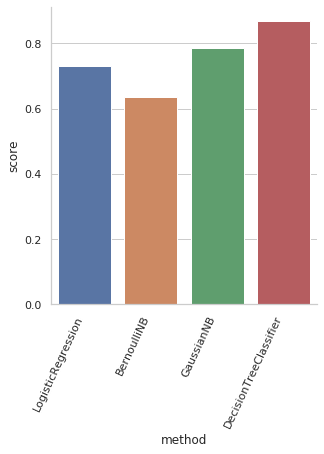

In [95]:
from sklearn.svm import SVC
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report


# X, y = make_classification(n_samples=100, n_features=4,
#                             n_informative=2, n_redundant=0,
#                             random_state=0, shuffle=False)

# clf = BaggingClassifier(base_estimator=SVC(),
#                          n_estimators=10, random_state=0).fit(X, y)


# Зададим параметры решающего дерева
dtc = DecisionTreeClassifier(criterion="entropy", min_samples_split=50)
bag_model=BaggingClassifier(base_estimator=dtc, n_estimators=100, bootstrap=True)
bag_model=bag_model.fit(X_train, y_train)
y_test_pred=bag_model.predict(X_test) # предсказание
print(bag_model.score(X_test, y_test))
# print(confusion_matrix(y_test, y_test_pred)) 

# Используем разные методы
lr = LogisticRegression();
bnb = BernoulliNB()
gnb = GaussianNB()

base_methods=[lr, bnb, gnb, dtc]
scores = []
output_method_names = []

# Пройдёмся по разным методам и отобразим из точность
for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train, y_train)
 y_test_pred=bag_model.predict(X_test)
 print('\n',classification_report(y_test, y_test_pred))
 model_score = bag_model.score(X_test, y_test)
 print('Score: ', model_score)
 scores.append(model_score)

#  print(confusion_matrix(y_test, y_test_pred)) 

for bm in base_methods:
  name, _ = str(bm).split('(')
  output_method_names.append(name)

scores_df = pd.DataFrame(list(zip(output_method_names, scores)), 
                         columns=['method', 'score'])

print(scores_df) #Наш датафрейм для красивого отображения
    
# Отобразим график алгоритма к его оценке
chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df);

chart.set_xticklabels(rotation=65, horizontalalignment='right')



Метод:  LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

               precision    recall  f1-score   support

           0       0.88      0.97      0.92       940
           1       0.54      0.19      0.29       160

    accuracy                           0.86      1100
   macro avg       0.71      0.58      0.60      1100
weighted avg       0.83      0.86      0.83      1100

Score:  0.8590909090909091

Метод:  BernoulliNB(alpha=1.0, binarize=0.0, class_prior=None, fit_prior=True)

               precision    recall  f1-score   support

           0       0.88      0.95      0.91       940
           1       0.41      0.22      0.28       160

    accuracy                           0.84      1100
   macro 

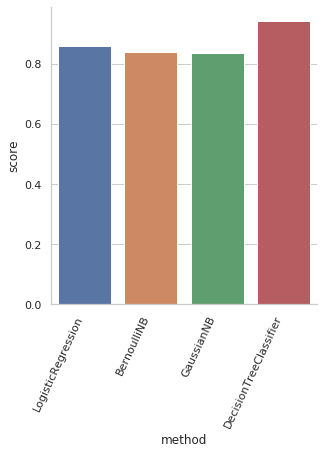

In [144]:
# onehot
scores_onehot = []

for bm  in base_methods:
 print("\nМетод: ", bm)
 bag_model=BaggingClassifier(base_estimator=bm, n_estimators=100, bootstrap=True)
 bag_model=bag_model.fit(X_train_onehot, y_train_onehot)
 y_test_pred_onehot=bag_model.predict(X_test_onehot)
 print('\n',classification_report(y_test_onehot, y_test_pred_onehot))
 model_score = bag_model.score(X_test_onehot, y_test_onehot)
 print('Score: ', model_score)
 scores_onehot.append(model_score)

scores_df_onehot = pd.DataFrame(list(zip(output_method_names, scores_onehot)), 
                         columns=['method', 'score'])

chart = sns.catplot(x='method', y='score', kind="bar", data=scores_df_onehot);

chart.set_xticklabels(rotation=65, horizontalalignment='right')

У всех выросли показатели, меньше всего у классификатора решающего дерева

Проведём эксперимент со случайным лесом

In [0]:
# Импорт модели, которую будем использовать
from sklearn.ensemble import RandomForestRegressor
# Инстанциируем модель с 1000 деревьями решений
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Натренируем модель на train данных
rf.fit(X_train, y_train);

In [116]:
# Используем метод предсказания 'леса' на тестовых данных
predictions = rf.predict(X_test)
# Высчитаем абсолютные ошибки
errors = abs(predictions - y_test)
# Высчитаем среднюю абсолютную ошибку (mae)
print('Average Absolute Error:', round(np.mean(errors), 2), 'degrees.')

Average Absolute Error: 0.2 degrees.


In [117]:
# Высчитаем среднюю абсолютную ошибку (MAPE)
mape = 100 * (errors / y_test)
# Высчитаем и отобразим точность
accuracy = 100 - np.mean(mape)
print(mape)
print(accuracy)
# Выкинем nan
print('Accuracy:', round(accuracy, 2), '%.')

[ inf  inf  inf  inf 15.3  inf  inf  0.   4.5  inf  inf  inf 25.2  inf
  3.6 92.2  inf  inf  inf  inf  inf  5.9 84.   5.5  inf  inf  inf  inf
  inf  inf  inf  inf  inf  inf 11.2  inf  4.8  4.1  1.1  0.9  2.7  inf
  inf  0.  10.9 19.1  1.2  3.8  inf 72.1  inf 35.   0.3  inf  inf 11.2
  0.4  inf  inf  1.4  9.1  inf  9.1  1.1 84.3  0.7  4.8  inf 45.9  inf
 10.6  inf 30.8  inf  inf 18.2  4.4  1.   inf  9.3  9.8  inf  inf  inf
  2.7  inf 21.7  inf  inf  2.5 93.3  inf  inf  0.9  4.1 87.3  0.1 10.4
 11.  28.6  9.3 71.   inf  9.8  inf  4.9  7.5  inf  0.   inf  inf  1.1
  8.5  inf  4.   0.3  inf  inf  inf  inf 59.7  inf  8.  87.5  inf  inf
  inf  inf 20.   inf  0.8  2.7  inf  inf  8.8  2.6  inf  1.1  inf  inf
  inf  inf  inf 20.8  5.7 97.3  inf  0.  41.  58.7  inf  inf 85.6  9.8
 30.   inf 37.6  inf 19.6 50.8  6.   inf  inf  inf  8.2  inf  inf 19.5
  6.   inf  inf  inf  inf  6.1 35.3 11.2 93.3 97.8  2.4  inf  0.4  0.6
 30.8  1.4  inf  inf  4.3  inf  9.   inf 19.9  0.   6.1  inf  inf  inf
  inf 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.


In [118]:
from sklearn.ensemble import RandomForestRegressor
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

regressor = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

errors = abs(y_pred - y_test)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape = np.mean(100 * (errors / y_test))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Average absolute error:  0.2 degrees.
Mean Asolute Percentage Error
Mean Absolute Error: 0.2002194357366771
Mean Squared Error: 0.09649430947405085
Root Mean Squared Error: 0.31063533197955906


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':


In [146]:
# onehot
rf_onehot = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf_onehot.fit(X_train_onehot, y_train_onehot);

predictions_onehot = rf_onehot.predict(X_test_onehot)
errors_onehot = abs(predictions_onehot - y_test_onehot)
print('Average Absolute Error:', round(np.mean(errors_onehot), 2), 'degrees.')

mape_onehot = 100 * (errors_onehot / y_test_onehot)
accuracy_onehot = 100 - np.mean(mape_onehot)
print(mape_onehot)
print(accuracy_onehot)
print('Accuracy:', round(accuracy_onehot, 2), '%.')

regressor_onehot = RandomForestRegressor(n_estimators=1200, random_state=100)
regressor_onehot.fit(X_train_onehot, y_train_onehot)
y_pred_onehot = regressor_onehot.predict(X_test_onehot)

errors_onehot = abs(y_pred_onehot - y_test_onehot)
# Отобразим обученную на расширенных данных
print('Average absolute error: ', round(np.mean(errors_onehot), 2), 'degrees.')
print('Mean Asolute Percentage Error')
mape_onehot = np.mean(100 * (errors_onehot / y_test_onehot))


# Отобразим наши метрики
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test_onehot, y_pred_onehot))
print('Mean Squared Error:', metrics.mean_squared_error(y_test_onehot, y_pred_onehot))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test_onehot, y_pred_onehot)))

Average Absolute Error: 0.1 degrees.
[inf inf 0.3 ... inf 0.2 inf]
nan
Accuracy: nan %.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in true_divide
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in true_divide
  


Average absolute error:  0.1 degrees.
Mean Asolute Percentage Error
Mean Absolute Error: 0.09940151515151516
Mean Squared Error: 0.04188091414141415
Root Mean Squared Error: 0.20464826933403113


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide


Показатели ниже чем без onehot

Построим линейную регрессию

In [148]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

print(X_train.shape)
print(y_train.shape)
print(X_train_onehot.shape)
print(y_train_onehot.shape)

# Создадим экземпляр класса логистической регрессии и передадим в него обучающие выборки
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

logreg_onehot = LogisticRegression()
logreg_onehot.fit(X_train_onehot, y_train_onehot)

(647, 15)
(647,)
(2233, 17)
(2233,)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [149]:
y_pred = logreg.predict(X_test) 
print('Точность классификатора логистической регрессии на test set: {:.2f}'.format(logreg.score(X_test, y_test)))

#Построим confusion matrix что бы увидеть точность по TP TN FP FN
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix, '\n')

# Выведем метрики нашего классификатора
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

Точность классификатора логистической регрессии на test set: 0.73
[[121  36]
 [ 50 112]] 

              precision    recall  f1-score   support

           0       0.71      0.77      0.74       157
           1       0.76      0.69      0.72       162

    accuracy                           0.73       319
   macro avg       0.73      0.73      0.73       319
weighted avg       0.73      0.73      0.73       319



In [161]:
#onehot
y_pred_onehot = logreg_onehot.predict(X_test_onehot) 
print('Точность классификатора логистической регрессии с onehot на test set: {:.2f}'.format(logreg_onehot.score(X_test_onehot, y_test_onehot)))

from sklearn.metrics import confusion_matrix
confusion_matrix_onehot = confusion_matrix(y_test_onehot, y_pred_onehot)
print(confusion_matrix_onehot, '\n')
print(classification_report(y_test_onehot, y_pred_onehot))

Точность классификатора логистической регрессии с onehot на test set: 0.86
[[913  27]
 [127  33]] 

              precision    recall  f1-score   support

           0       0.88      0.97      0.92       940
           1       0.55      0.21      0.30       160

    accuracy                           0.86      1100
   macro avg       0.71      0.59      0.61      1100
weighted avg       0.83      0.86      0.83      1100



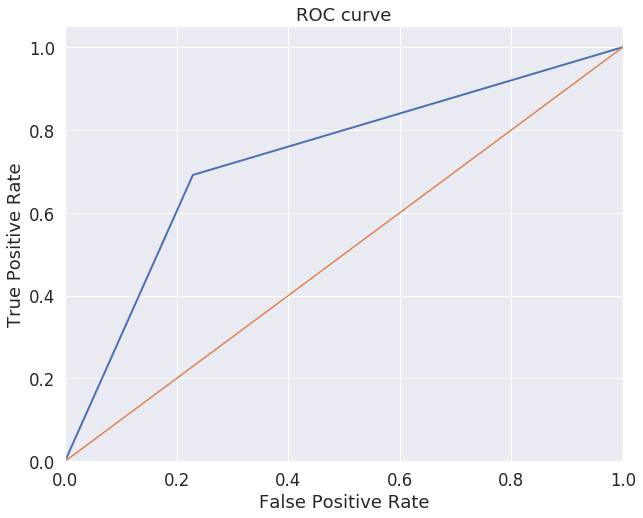

In [150]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve ')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

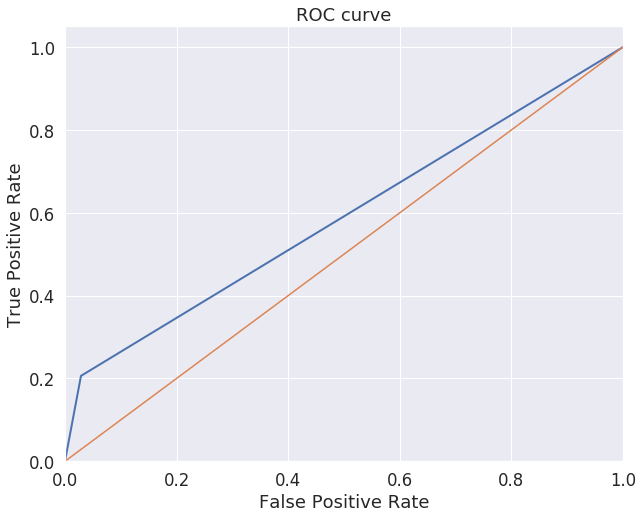

In [163]:
#onehot
fpr_onehot, tpr_onehot, thresholds_onehot = metrics.roc_curve(y_test_onehot, y_pred_onehot, pos_label=1)
lw = 2

plt.figure(figsize=(10, 8))
plt.plot(fpr_onehot, tpr_onehot, lw=lw, label='ROC curve onehot')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

Попробуем лоигистическую регрессию с кросс валидацией

In [164]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn import preprocessing

X_scaled = preprocessing.scale(X_train)
print(X_scaled.shape)

X_scaled_onehot = preprocessing.scale(X_train_onehot)
print(X_scaled_onehot.shape)

# Скормим данные на которых она будет учиться
logReg_cv        = LogisticRegressionCV(cv=5, random_state=0, max_iter=210).fit(X_scaled, y_train)
logReg_cv_onehot = LogisticRegressionCV(cv=5, random_state=0, max_iter=210).fit(X_scaled_onehot, y_train_onehot)


(647, 15)
(2233, 17)


In [165]:
print('Оценка логистических регрессий:')
y_pred_cv = logReg_cv.predict(X_test)
print(logReg_cv.score(X_test, y_test))

y_pred_cv_onehot = logReg_cv_onehot.predict(X_test_onehot)
print(logReg_cv_onehot.score(X_test_onehot, y_test_onehot))

from sklearn.metrics import confusion_matrix
confusion_matrix_normal = confusion_matrix(y_test, y_pred)
print(confusion_matrix_normal, '\n')

confusion_matrix_onehot = confusion_matrix(y_test_onehot, y_pred_onehot)
print(confusion_matrix_onehot, '\n')

print(classification_report(y_test, y_pred_cv))
print(classification_report(y_test_onehot, y_pred_cv_onehot))

Оценка логистических регрессий:
0.7084639498432602
0.860909090909091
[[121  36]
 [ 50 112]] 

[[913  27]
 [127  33]] 

              precision    recall  f1-score   support

           0       0.75      0.61      0.67       157
           1       0.68      0.81      0.74       162

    accuracy                           0.71       319
   macro avg       0.72      0.71      0.70       319
weighted avg       0.72      0.71      0.71       319

              precision    recall  f1-score   support

           0       0.88      0.98      0.92       940
           1       0.57      0.19      0.28       160

    accuracy                           0.86      1100
   macro avg       0.72      0.58      0.60      1100
weighted avg       0.83      0.86      0.83      1100



с one hot показатели везде выше

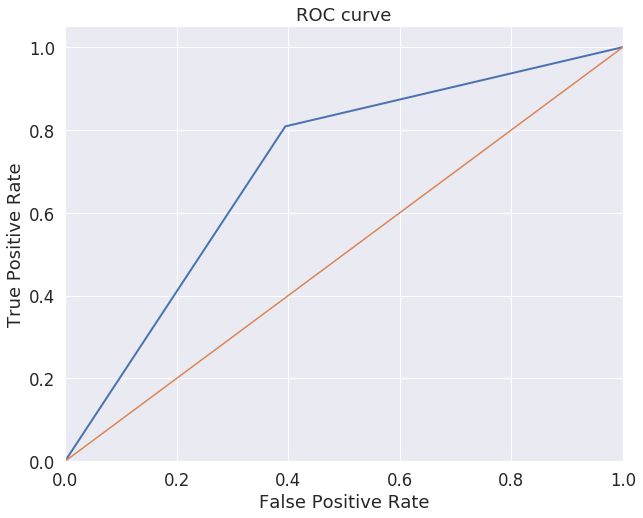

In [166]:
sns.set(font_scale=1.5)
sns.set_color_codes("muted")

plt.figure(figsize=(10, 8))
# Передадим целевой столбец ответом и результат классификатора
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_cv, pos_label=1)
lw = 2

# Зададим параметры отображения
plt.plot(fpr, tpr, lw=lw, label='ROC curve after Cross Validation')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

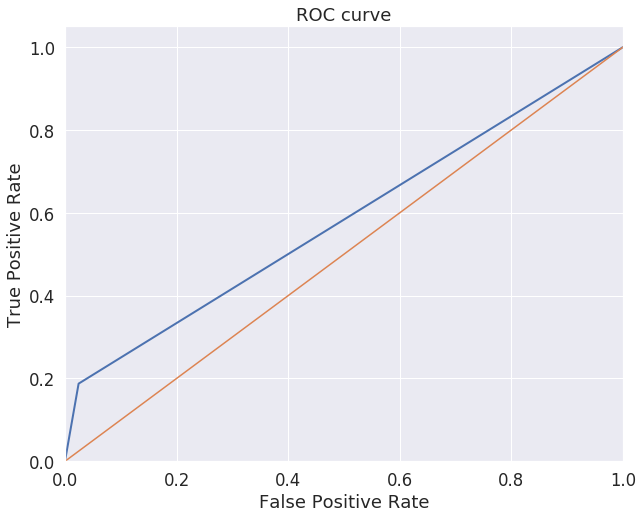

In [168]:
#onehot
plt.figure(figsize=(10, 8))
fpr_onehot, tpr_onehot, thresholds_onehot = metrics.roc_curve(y_test_onehot, y_pred_cv_onehot, pos_label=1)
lw = 2

plt.plot(fpr_onehot, tpr_onehot, lw=lw, label='ROC curve after Cross Validation with onehot')
plt.plot([0, 1], [0, 1])
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.savefig("ROC.png")
plt.show()

и без и с кросс валидацией roc кривая не изменяется с one hot кодированием

Используем нейросетевой подход

In [100]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

tf.keras.backend.clear_session()  # Для чистого/простого сброса состояния notebook.


In [0]:
from tensorflow import keras
from tensorflow.keras import layers

# Подготовим данные для модели
inputs = keras.Input(shape=(15), name='digits')
x = layers.Dense(64, activation='relu', name='dense_1')(inputs)
x = layers.Dense(64, activation='relu', name='dense_2')(x)
outputs = layers.Dense(10, activation='softmax', name='predictions')(x)

# Поместим данные в модель
model = keras.Model(inputs=inputs, outputs=outputs)


In [104]:
model.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model.fit(x=X, y=y, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model.evaluate(X, y, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions = model.predict(X_test[:4])
print('predictions shape:', predictions.shape)


# Fit model on training data
Train on 966 samples
966/966 [==============================] - 0s 252us/sample - loss: 1.3123 - sparse_categorical_accuracy: 0.6108

history dict: {'loss': [1.3123412002687869], 'sparse_categorical_accuracy': [0.61076605]}

# Evaluate on test data
966/966 [==============================] - 0s 32us/sample - loss: 0.7629 - sparse_categorical_accuracy: 0.7195
test loss, test acc: [0.7628603612167247, 0.7194617]

# Generate predictions for 3 samples
predictions shape: (4, 10)


In [0]:
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(12, input_dim=15, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])


In [113]:
X_train_keras, X_test_keras, y_train_keras, y_test_keras = train_test_split(X, y, test_size=0.35, random_state=0)
model.fit(X_train_keras, y_train_keras, epochs=200, batch_size=10) # Сделаем колличество эпох обучения 400 что бы лучше обучить модель

Epoch 1/200
627/627 [==============================] - 0s 559us/step - loss: 0.7592 - acc: 0.4833
Epoch 2/200
627/627 [==============================] - 0s 114us/step - loss: 0.7107 - acc: 0.5104
Epoch 3/200
627/627 [==============================] - 0s 113us/step - loss: 0.6911 - acc: 0.5582
Epoch 4/200
627/627 [==============================] - 0s 112us/step - loss: 0.6782 - acc: 0.5774
Epoch 5/200
627/627 [==============================] - 0s 117us/step - loss: 0.6667 - acc: 0.5981
Epoch 6/200
627/627 [==============================] - 0s 123us/step - loss: 0.6559 - acc: 0.6156
Epoch 7/200
627/627 [==============================] - 0s 120us/step - loss: 0.6459 - acc: 0.6411
Epoch 8/200
627/627 [==============================] - 0s 116us/step - loss: 0.6356 - acc: 0.6730
Epoch 9/200
627/627 [==============================] - 0s 122us/step - loss: 0.6251 - acc: 0.6874
Epoch 10/200
627/627 [==============================] - 0s 124us/step - loss: 0.6142 - acc: 0.7129
Epoch 11/200
627/62

In [114]:
_, accuracy = model.evaluate(X, y)
print('Accuracy: %.2f' % (accuracy*100))

966/966 [==============================] - 0s 102us/step
Accuracy: 88.72


adam классификатор - 92%
sgd - 88.72%

In [134]:
# Поместим в неё one-hot формат

inputs_onehot = keras.Input(shape=(17), name='digits')
x_onehot = layers.Dense(64, activation='relu', name='dense_1')(inputs_onehot)
x_onehot = layers.Dense(64, activation='relu', name='dense_2')(x_onehot)
outputs_onehot = layers.Dense(30000, activation='softmax', name='predictions')(x_onehot)

# Поместим данные в модель
model_onehot = keras.Model(inputs=inputs_onehot, outputs=outputs_onehot)

model_onehot.compile(optimizer=keras.optimizers.RMSprop(),  # Optimizer
              # Loss function to minimize
              loss=keras.losses.SparseCategoricalCrossentropy(),
              # List of metrics to monitor
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# Train the model by slicing the data into "batches"
# of size "batch_size", and repeatedly iterating over
# the entire dataset for a given number of "epochs"
print('# Fit model on training data')
# history = model.fit(X_train, y_train,
#                     batch_size=64,
#                     epochs=3,
                    # Добавил валидацию для мониторинга потерь и метрик в конце эпох
                    # validation_data=(x_val, y_val))
history = model_onehot.fit(x=X_train_onehot, y=y_train_onehot, batch_size=None, epochs=1,
                   verbose=1, callbacks=None, validation_split=0.0,
                   validation_data=None, shuffle=True, class_weight=None, 
                   sample_weight=None, initial_epoch=0, steps_per_epoch=None, 
                   validation_steps=None, validation_freq=1, max_queue_size=10,
                   workers=1, use_multiprocessing=False)


# Возвращённый объект "Истории" имеет записи значний
# потерь и метрики значения в ходе обучения
# print('\nhistory dict:', history.history)

# Оценим модель на тестовых данных используя `evaluate`
print('\n# Evaluate on test data')
results = model_onehot.evaluate(X_train_onehot, y_train_onehot, batch_size=128)
print('test loss, test acc:', results)

# Генерируем предсказания (вероятность -- вывод последнего слоя)
# используем `predict` на новых данных
print('\n# Generate predictions for 3 samples')
predictions_onehot = model_onehot.predict(X_test_onehot[:4])
print('predictions shape:', predictions_onehot.shape)


model_onehot = Sequential()
model_onehot.add(Dense(12, input_dim=17, activation='relu'))
model_onehot.add(Dense(8, activation='relu'))
model_onehot.add(Dense(1, activation='sigmoid'))

# скомпилируем keras model
model_onehot.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

X_train_keras_onehot, X_test_keras_onehot, y_train_keras_onehot, y_test_keras_onehot = train_test_split(X_train_onehot, y_train_onehot, test_size=0.35, random_state=0)
model_onehot.fit(X_train_keras_onehot, y_train_keras_onehot, epochs=200, batch_size=10) # Сделаем колличество эпох обучения 400 что бы лучше обучить модель

# Fit model on training data
Train on 2233 samples
2233/2233 [==============================] - 3s 1ms/sample - loss: 4.3120 - sparse_categorical_accuracy: 0.8039

# Evaluate on test data
2233/2233 [==============================] - 1s 571us/sample - loss: 0.4767 - sparse_categorical_accuracy: 0.8554
test loss, test acc: [0.47669118373211433, 0.85535157]

# Generate predictions for 3 samples
predictions shape: (4, 30000)
Epoch 1/200
1451/1451 [==============================] - 1s 643us/step - loss: 0.5094 - acc: 0.8291
Epoch 2/200
1451/1451 [==============================] - 0s 127us/step - loss: 0.4514 - acc: 0.8546
Epoch 3/200
1451/1451 [==============================] - 0s 129us/step - loss: 0.4188 - acc: 0.8553
Epoch 4/200
1451/1451 [==============================] - 0s 132us/step - loss: 0.3973 - acc: 0.8539
Epoch 5/200
1451/1451 [==============================] - 0s 125us/step - loss: 0.3816 - acc: 0.8553
Epoch 6/200
1451/1451 [==============================] - 0s 127us/step - lo

In [136]:
_, accuracy = model_onehot.evaluate(X_train_onehot, y_train_onehot)
print('Accuracy: %.2f' % (accuracy*100))

2233/2233 [==============================] - 0s 155us/step
Accuracy: 93.73


Точность при равном колличестве эпох сильно выросла